# Urban Analysis ML Project

## Step 1: Create Synthetic Dataset
We'll create a synthetic dataset for urban analysis. The dataset will include features like `area_type`, `population_density`, `traffic_flow`, `green_spaces`, and `public_transport`. The target variable will be `optimization_suggestion`.


In [ ]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)
num_samples = 1000

data = {
    'area_type': np.random.choice(['downtown', 'suburban', 'industrial'], num_samples),
    'population_density': np.random.randint(100, 1000, num_samples),
    'traffic_flow': np.random.randint(50, 500, num_samples),
    'green_spaces': np.random.randint(0, 100, num_samples),
    'public_transport': np.random.randint(0, 100, num_samples),
    'optimization_suggestion': np.random.choice(['increase_green_spaces', 'optimize_traffic', 'expand_public_transport'], num_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('urban_data.csv', index=False)
print("Synthetic dataset created and saved to urban_data.csv.")


## Step 2: Train the Urban Model

We’ll train a machine learning model to predict optimization suggestions based on the dataset.


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import pandas as pd
# Load the dataset
df = pd.read_csv('urban_data.csv')

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['area_type'], drop_first=True)

# Prepare features and target
X = df.drop('optimization_suggestion', axis=1)
y = df['optimization_suggestion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Save the model
joblib.dump(model, 'urban_optimization_model.pkl')
print("Model trained and saved to urban_optimization_model.pkl.")


Model accuracy: 27.50%
Model trained and saved to urban_optimization_model.pkl.


## Step 3: Predict Optimization Suggestions

We’ll use the trained model to predict optimization suggestions for a given area.


In [ ]:
# Load the trained model
model = joblib.load('urban_optimization_model.pkl')

# Example input data

input_data = {
    'population_density': 500,
    'traffic_flow': 300,
    'green_spaces': 50,
    'public_transport': 70,
    'area_type_downtown': 1,
    'area_type_industrial': 0
}
# Convert input data to DataFrame
input_df = pd.DataFrame([input_data])

# Make prediction
prediction = model.predict(input_df)
print(f"Optimization Suggestion: {prediction[0]}")


Optimization Suggestion: expand_public_transport


/home/kasinadhsarma/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area_type_downtown
Feature names seen at fit time, yet now missing:
- area_type_suburban

  warnings.warn(message, FutureWarning)


## Step 4: Visualize Feature Importance

We’ll visualize the importance of each feature in the model.


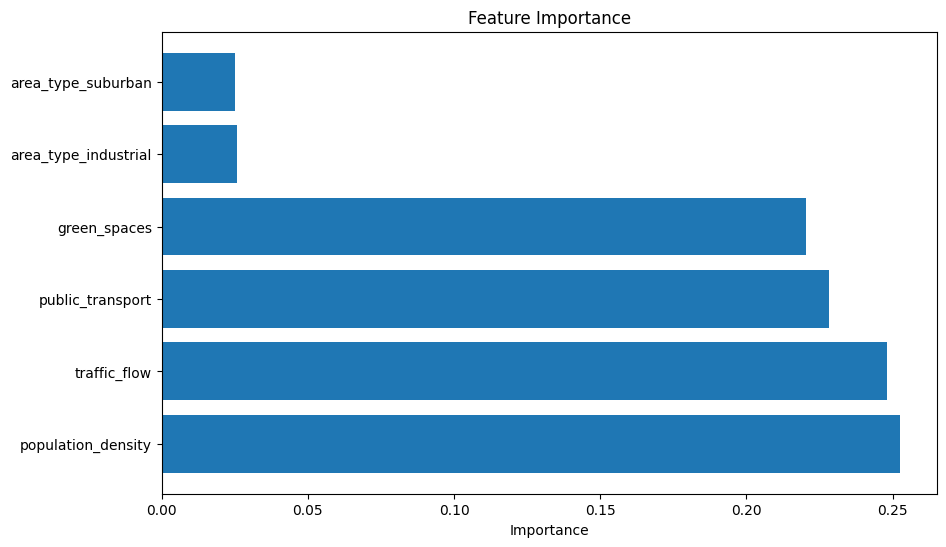

In [5]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
